In [1]:
!pip install prophet scikit-learn matplotlib pandas


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Future Interns/sales_data_sample.csv', encoding='ISO-8859-1')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
# Convert 'ORDERDATE' to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Drop rows with invalid 'ORDERDATE' (if any)
df = df.dropna(subset=['ORDERDATE'])


In [5]:
# Aggregate sales by day
df_daily = df.groupby('ORDERDATE')['SALES'].sum().reset_index()

# Rename columns for Prophet
df_daily.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'}, inplace=True)


In [6]:
# Resample to monthly and sum sales
df_monthly = df.set_index('ORDERDATE').resample('M')['SALES'].sum().reset_index()

# Rename columns for Prophet
df_monthly.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'}, inplace=True)


<ipython-input-6-c5f8292fd446>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('ORDERDATE').resample('M')['SALES'].sum().reset_index()


In [7]:
df_daily.head()


,ds,y
0,2003-01-06,12133.25
1,2003-01-09,11432.34
2,2003-01-10,6864.05
3,2003-01-29,54702.00
4,2003-01-31,44621.96


In [36]:
from prophet import Prophet
import pandas as pd

# Assuming df is your dataframe, with 'ORDERDATE' and 'SALES' columns
df_daily = df[['ORDERDATE', 'SALES']].rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'})
df_daily['ds'] = pd.to_datetime(df_daily['ds'])  # Ensure 'ds' is in datetime format

# Initialize the Prophet model
model = Prophet()

# Fit the model on the dataset
model.fit(df_daily)

# Manually create future dates (next 30 days)
last_date = df_daily['ds'].max()
future_dates = pd.date_range(last_date, periods=31, freq='D')[1:]  # Generate 30 future days

# Create a DataFrame for future dates
future_df = pd.DataFrame(future_dates, columns=['ds'])

# Make predictions using the model
forecast = model.predict(future_df)

# Show the results of the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2ncl4c/muog2mte.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2ncl4c/sefaq23g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4780', 'data', 'file=/tmp/tmpxn2ncl4c/muog2mte.json', 'init=/tmp/tmpxn2ncl4c/sefaq23g.json', 'output', 'file=/tmp/tmpxn2ncl4c/prophet_modelnatkys7p/prophet_model-20250429145612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
25,2005-06-26,3498.931945,1166.801896,6006.750376
26,2005-06-27,3521.888880,1257.432785,5806.838369
27,2005-06-28,3785.281404,1486.887551,6049.904101
28,2005-06-29,3599.666806,1157.420893,5818.870628
29,2005-06-30,3833.493339,1440.315156,6277.270572


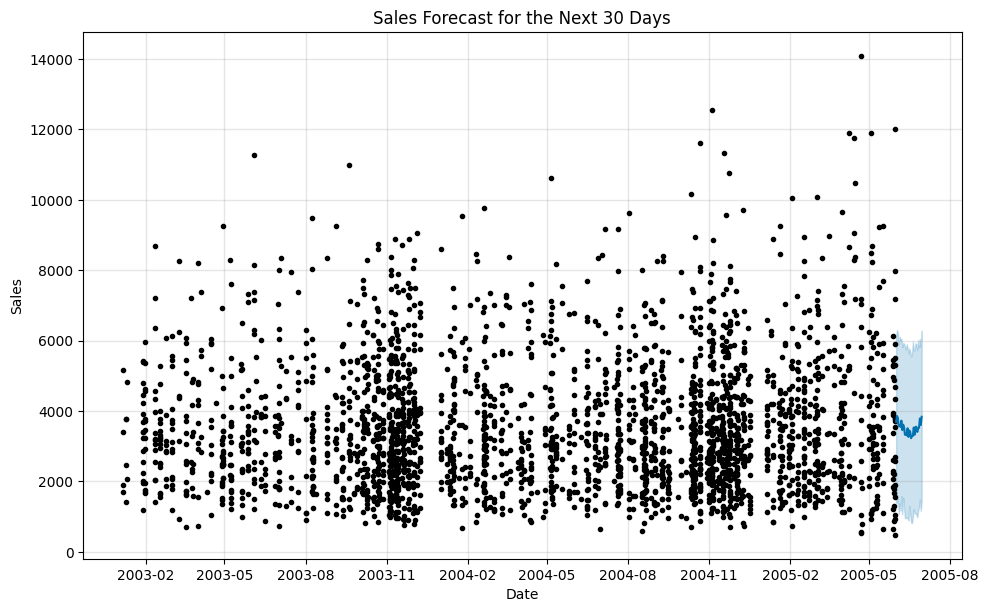

In [37]:
import matplotlib.pyplot as plt

# Plot the forecasted values
model.plot(forecast)
plt.title('Sales Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [39]:
# Check the column names
print(df.columns)


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [40]:
df = df.rename(columns={'ORDERDATE': 'ds'})


In [41]:
df['ds'] = pd.to_datetime(df['ds'])


In [42]:
df = df[['ds', 'SALES']]


In [44]:
df = df.rename(columns={'SALES': 'y'})


In [45]:
df['ds'] = pd.to_datetime(df['ds'])


In [51]:
# No need to rename columns, 'ds' and 'y' are already correct
df_daily = df[['ds', 'y']]
df_daily['ds'] = pd.to_datetime(df_daily['ds'])  # Ensure 'ds' is in datetime format

# Initialize the Prophet model
model = Prophet()

# Fit the model on the dataset
model.fit(df_daily)

# Manually create future dates (next 30 days)
last_date = df_daily['ds'].max()
future_dates = pd.date_range(last_date, periods=31, freq='D')[1:]  # Generate 30 future days

# Create a DataFrame for future dates
future_df = pd.DataFrame(future_dates, columns=['ds'])

# Make predictions using the model
forecast = model.predict(future_df)

# Show the results of the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2ncl4c/9lnt1hbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxn2ncl4c/61sum3qj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7930', 'data', 'file=/tmp/tmpxn2ncl4c/9lnt1hbl.json', 'init=/tmp/tmpxn2ncl4c/61sum3qj.json', 'output', 'file=/tmp/tmpxn2ncl4c/prophet_modell9z_izn_/prophet_model-20250429150209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
25,2005-06-26,3498.931945,1101.880377,5890.265480
26,2005-06-27,3521.888880,1263.237344,5728.377240
27,2005-06-28,3785.281404,1510.704350,6058.925275
28,2005-06-29,3599.666806,1282.181603,6131.261461
29,2005-06-30,3833.493339,1478.813678,6291.671165


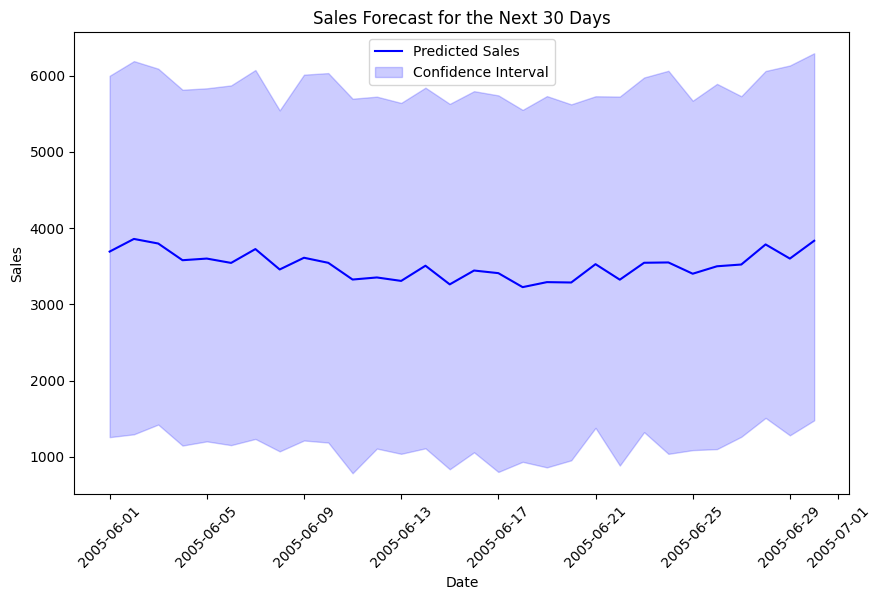

In [52]:
import matplotlib.pyplot as plt

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Sales', color='blue')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for the Next 30 Days')
plt.legend()
plt.xticks(rotation=45)
plt.show()


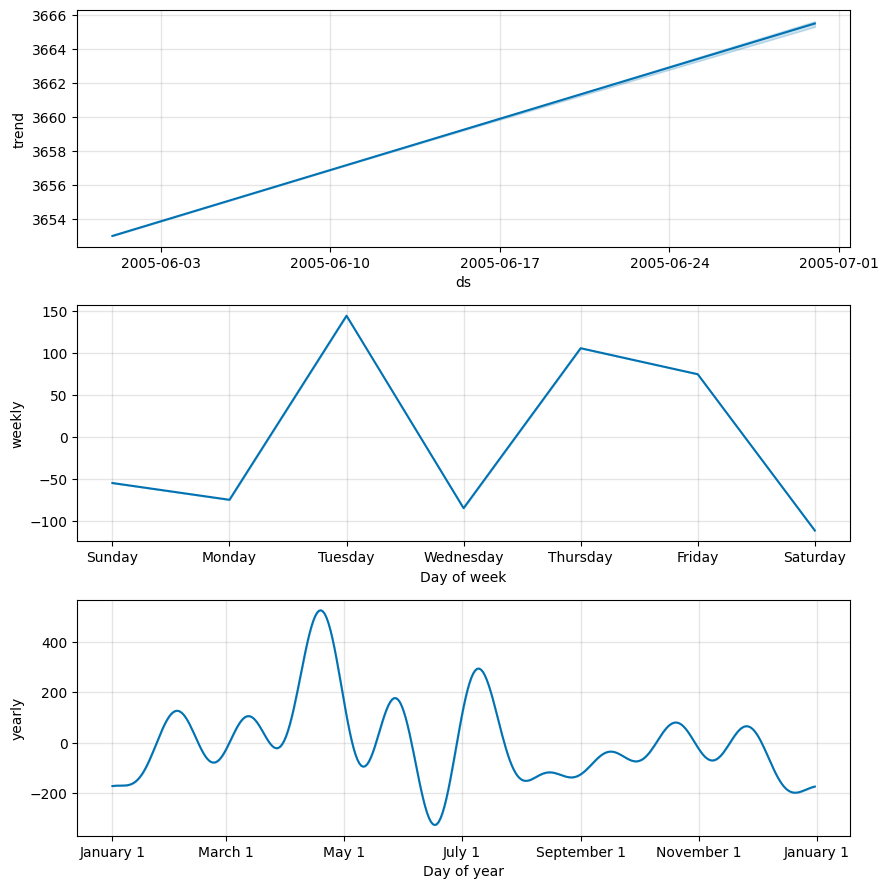

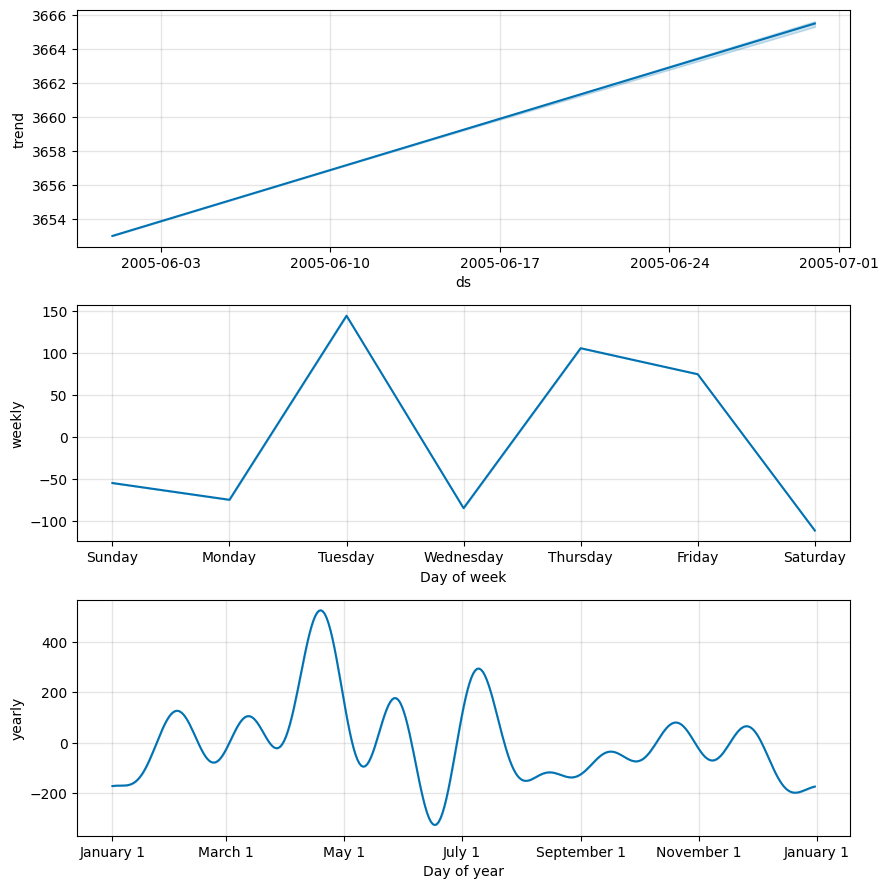

In [53]:
# Plot seasonality and trend components
model.plot_components(forecast)


In [54]:
# Export forecast to a CSV file
forecast.to_csv('sales_forecast.csv', index=False)
